<a href="https://colab.research.google.com/github/mk7890/Python_Data_Analysis/blob/main/Pandas_weeklyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **09 Time Series**

# Apple Stock

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import the dataset from address
# assign to variable called apple

url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple=pd.read_csv(url)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [3]:
# Check out the type of the columns
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [5]:
# Transform the Date column as a datetime type
apple['Date']=pd.to_datetime(apple['Date'])
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [6]:
apple.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [7]:
# Set the date as the index
apple=apple.set_index('Date')
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [8]:
# Is there any duplicate dates?
apple.index.is_unique

True

In [9]:
# Ops...it seems the index is from the most recent date. Make the first entry the oldest date.
apple.sort_index(ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [10]:
# Get the last business day of each month
apple.resample('BM').last()

<ipython-input-10-ff348f23d2ec>:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple.resample('BM').last()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


In [12]:
# What is the difference in days between the first day and the oldest
print(f"{(apple.index.max()-apple.index.min()).days} days")

12261 days


In [13]:
# How many months in the data we have?
print(f"{(apple.index.max()-apple.index.min()).days/30} months")

408.7 months


<Axes: xlabel='Date'>

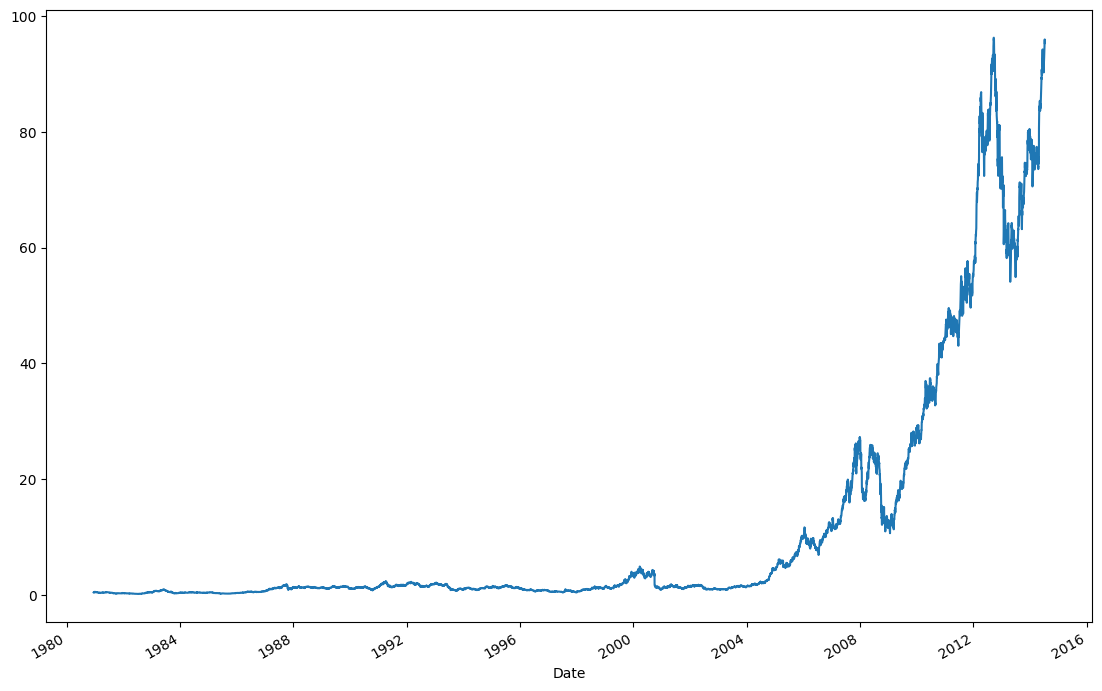

In [16]:
# Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches
import matplotlib.pyplot as plt

apple['Adj Close'].plot(figsize=(13.5,9))

In [ ]:
# BONUS: create a question and answer it

# **10. Deleting**

# Wine dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# import dataset from address and assign to variable
wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(wine_url)
wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
wine.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [29]:
# Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns
# Assuming your DataFrame is named df
columns_to_delete = ['1', '2.43', '2.8', '.28', '5.64', '3.92', '1065']
wine = wine.drop(columns=columns_to_delete)

# Print the updated DataFrame
print(wine)


     14.23  1.71  15.6  127  3.06  2.29  1.04
0    13.20  1.78  11.2  100  2.76  1.28  1.05
1    13.16  2.36  18.6  101  3.24  2.81  1.03
2    14.37  1.95  16.8  113  3.49  2.18  0.86
3    13.24  2.59  21.0  118  2.69  1.82  1.04
4    14.20  1.76  15.2  112  3.39  1.97  1.05
..     ...   ...   ...  ...   ...   ...   ...
172  13.71  5.65  20.5   95  0.61  1.06  0.64
173  13.40  3.91  23.0  102  0.75  1.41  0.70
174  13.27  4.28  20.0  120  0.69  1.35  0.59
175  13.17  2.59  20.0  120  0.68  1.46  0.60
176  14.13  4.10  24.5   96  0.76  1.35  0.61

[177 rows x 7 columns]


In [30]:
# Assign the columns as below:
'''
The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):

alcohol
malic_acid
alcalinity_of_ash
magnesium
flavanoids
proanthocyanins
hue
'''
wine.columns=['alcohol','malic_acid','alcalinity_of_ash','magnesium','flavanoids','proanthocyanins','hue']
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,1.05
1,13.16,2.36,18.6,101,3.24,2.81,1.03
2,14.37,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95,0.61,1.06,0.64
173,13.40,3.91,23.0,102,0.75,1.41,0.70
174,13.27,4.28,20.0,120,0.69,1.35,0.59
175,13.17,2.59,20.0,120,0.68,1.46,0.60


In [31]:
# Set the values of the first 3 rows from alcohol as NaN
wine.loc[:2,'alcohol']=np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,1.05
1,NaN,2.36,18.6,101,3.24,2.81,1.03
2,NaN,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95,0.61,1.06,0.64
173,13.40,3.91,23.0,102,0.75,1.41,0.70
174,13.27,4.28,20.0,120,0.69,1.35,0.59
175,13.17,2.59,20.0,120,0.68,1.46,0.60


In [32]:
# Now set the value of the rows 3 and 4 of magnesium as NaN
wine.loc[2:3,'magnesium']=np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,1.05
1,NaN,2.36,18.6,101.0,3.24,2.81,1.03
2,NaN,1.95,16.8,NaN,3.49,2.18,0.86
3,13.24,2.59,21.0,NaN,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [33]:
# Fill the value of NaN with the number 10 in alcohol and 100 in magnesium
wine['alcohol'].fillna(10,inplace=True)
wine['magnesium'].fillna(100,inplace=True)
wine

<ipython-input-33-728445f99a44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine['alcohol'].fillna(10,inplace=True)
<ipython-input-33-728445f99a44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,1.05
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
2,10.00,1.95,16.8,100.0,3.49,2.18,0.86
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [34]:
# Count the number of missing values
wine.isnull().sum()

,0
alcohol,0
malic_acid,0
alcalinity_of_ash,0
magnesium,0
flavanoids,0
proanthocyanins,0
hue,0


In [35]:
# Create an array of 10 random numbers up until 10
random_numbers=np.random.randint(0,10,10)
random_numbers

array([4, 7, 2, 5, 0, 8, 8, 2, 4, 8])

In [36]:
# Use random numbers you generated as an index and assign NaN value to each of cell
wine.loc[random_numbers]=np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [38]:
# How many missing values do we have?
wine.isnull().value_counts().sum()

177

In [39]:
wine.isnull().sum()

,0
alcohol,6
malic_acid,6
alcalinity_of_ash,6
magnesium,6
flavanoids,6
proanthocyanins,6
hue,6


In [40]:
# Delete the rows that contain missing values
wine.dropna(inplace=True)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
6,14.06,2.15,17.6,121.0,2.51,1.25,1.06
9,14.10,2.16,18.0,105.0,3.32,2.38,1.25
10,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [41]:
# Print only the non-null values in alcohol
wine[wine['alcohol'].notnull()]

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,2.36,18.6,101.0,3.24,2.81,1.03
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
6,14.06,2.15,17.6,121.0,2.51,1.25,1.06
9,14.10,2.16,18.0,105.0,3.32,2.38,1.25
10,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [42]:
# Reset the index, so it starts with 0 again
wine.reset_index(drop=True,inplace=True)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,2.36,18.6,101.0,3.24,2.81,1.03
1,13.24,2.59,21.0,100.0,2.69,1.82,1.04
2,14.06,2.15,17.6,121.0,2.51,1.25,1.06
3,14.10,2.16,18.0,105.0,3.32,2.38,1.25
4,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
166,13.71,5.65,20.5,95.0,0.61,1.06,0.64
167,13.40,3.91,23.0,102.0,0.75,1.41,0.70
168,13.27,4.28,20.0,120.0,0.69,1.35,0.59
169,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [ ]:
# BONUS: Create your own question and answer it.